In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParamsDefault['figure.figsize'] = (6.4, 4.8)

In [10]:
scale_x = 2
scale_y = 1.5
figsize = (6.4*scale_x, 4.8*scale_y)
plt.rcParams['figure.figsize'] = figsize
sns.set(rc= {'figure.figsize': figsize})
plt.style.use('seaborn-darkgrid')

In [24]:
data = pd.read_csv('caso_practico_curse_bi.csv', encoding='latin-1')
data.head()

,plk-invoice-number,xyz-branch,city-ghh-998,type-usr-search,gender,category-catalog-dsp,cost of goods sold,sale,dateddmmyyy,time,payment-type-full,review
0,765-26-6951,A,Nueva York,Normal,Male,Sports and travel,435.66,457.443,1/1/2019,10:39,Credit card,6.9
1,530-90-9855,A,Nueva York,Member,Male,Home and lifestyle,380.72,399.756,1/1/2019,14:47,Cash,5.7
2,891-01-7034,B,Chicago,Normal,Female,Electronic accessories,448.26,470.673,1/1/2019,19:07,Cash,6.7
3,493-65-6248,C,Houston,Member,Female,Sports and travel,369.80,388.290,1/1/2019,19:48,Credit card,7.0
4,556-97-7101,C,Houston,Normal,Female,Electronic accessories,126.44,132.762,1/1/2019,15:51,Cash,8.5


In [25]:
name_mapper = {
    'plk-invoice-number': 'invoice',
    'xyz-branch': 'branch',
    'city-ghh-998': 'city',
    'type-usr-search': 'type',
    'category-catalog-dsp': 'category',
    'cost of goods sold': 'cogs',
    'sale': 'sales',
    'dateddmmyyy': 'date',
    'payment-type-full': 'payment',  
}

data.rename(columns=name_mapper, inplace=True)
data.head()


,invoice,branch,city,type,gender,category,cogs,sales,date,time,payment,review
0,765-26-6951,A,Nueva York,Normal,Male,Sports and travel,435.66,457.443,1/1/2019,10:39,Credit card,6.9
1,530-90-9855,A,Nueva York,Member,Male,Home and lifestyle,380.72,399.756,1/1/2019,14:47,Cash,5.7
2,891-01-7034,B,Chicago,Normal,Female,Electronic accessories,448.26,470.673,1/1/2019,19:07,Cash,6.7
3,493-65-6248,C,Houston,Member,Female,Sports and travel,369.80,388.290,1/1/2019,19:48,Credit card,7.0
4,556-97-7101,C,Houston,Normal,Female,Electronic accessories,126.44,132.762,1/1/2019,15:51,Cash,8.5


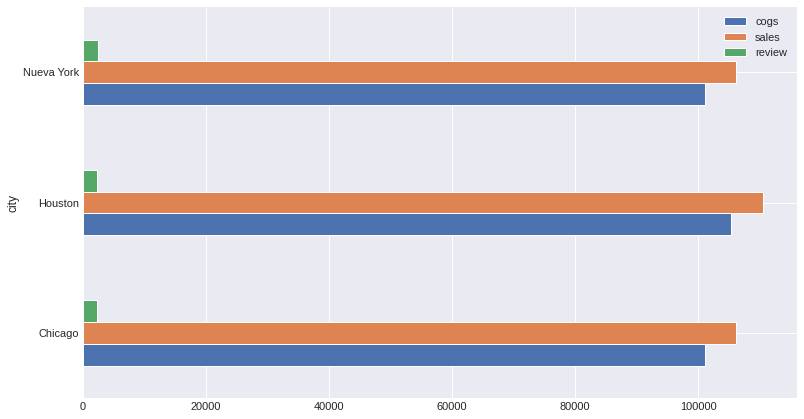

In [28]:
# total ventas,costos y reviews agrupado por ciudad
data.groupby('city').sum().plot(kind='barh')
plt.show()

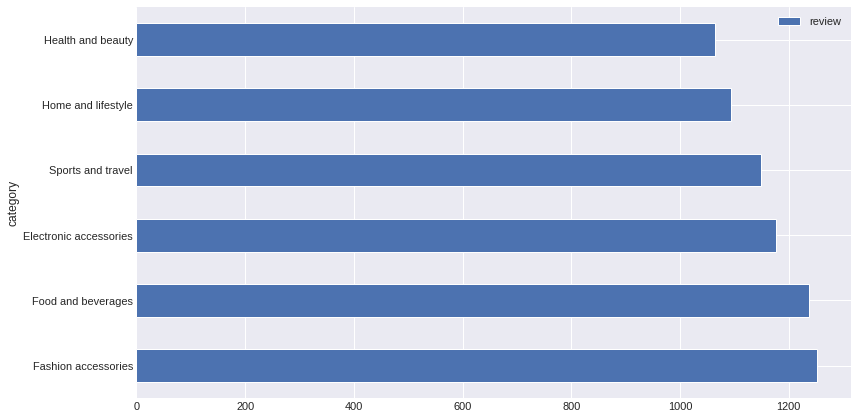

In [27]:
# Suma de los reviews por categoría
data[['category','review']].groupby('category').sum().sort_values(by='review', ascending=False).plot(kind='barh')
plt.show()

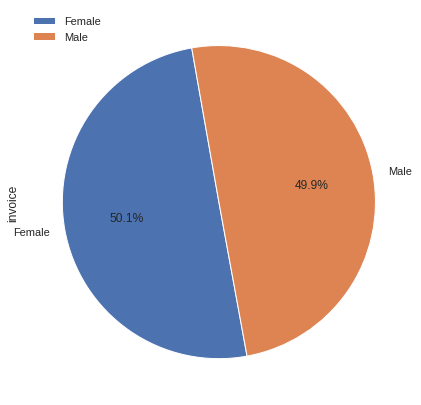

In [30]:
# porcentaje clientes por genero

data[['gender', 'invoice']].groupby('gender').count().plot(kind='pie', subplots= True, startangle=100, autopct = '%1.1f%%')
plt.show()

In [31]:
# metodos de pago
data[['payment', 'invoice']].groupby('payment').count()


,invoice
payment,
Cash,344
Credit card,311
Ewallet,345


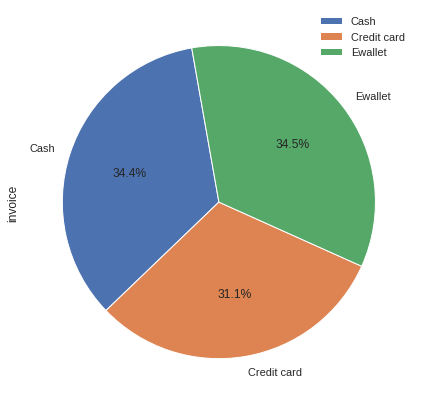

In [32]:
data[['payment', 'invoice']].groupby('payment').count().plot(kind='pie', subplots=True, startangle=100, autopct='%1.1f%%')

plt.show()

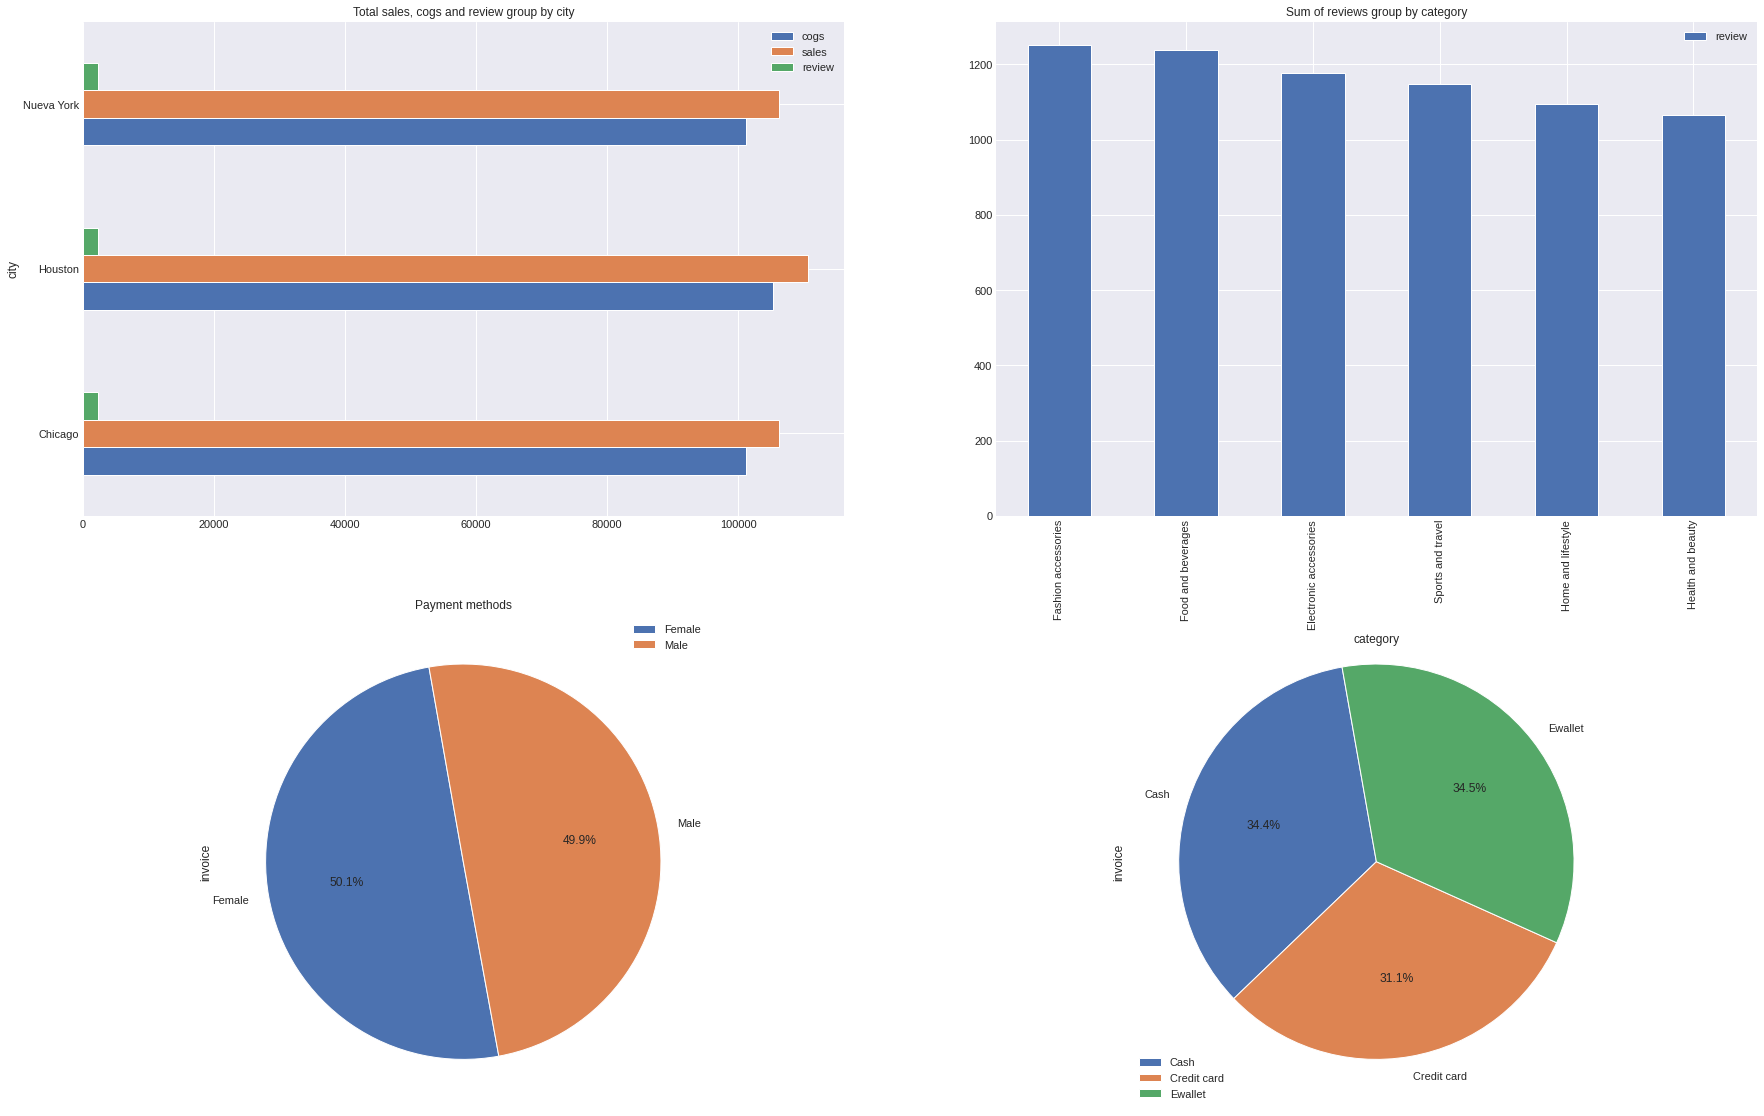

In [35]:
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30,20))

ax1.set_title('Total sales, cogs and review group by city')
data.groupby('city').sum().plot(kind='barh', ax=ax1)

ax2.set_title('Sum of reviews group by category')
data[['category', 'review']].groupby('category').sum().sort_values(by='review', ascending=False).plot(kind='bar', ax=ax2)

ax3.set_title('Percentage of customers group by gender')
data[['gender', 'invoice']].groupby('gender').count().plot(kind='pie', subplots=True, startangle=100, autopct='%1.1f%%', ax=ax3)

ax3.set_title('Payment methods')
data[['payment', 'invoice']].groupby('payment').count().plot(kind='pie', subplots=True, startangle=100, autopct='%1.1f%%', ax=ax4)

plt.show()